# Assignment 1.2 - Part A - Nightingale's Rose Chart

### Name: Sen Yan
### ID: 19315814

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as pch
from matplotlib.collections import PatchCollection

In [2]:
# Load and show the data

data = pd.read_excel("nightingale-data.xlsx")
data.head(10)

,Unnamed: 0,Unnamed: 1,Deaths,Unnamed: 3,Unnamed: 4,Annual rate of mortality per 1000,Unnamed: 6,Unnamed: 7
0,Month,Average size of army,Zymotic diseases,Wounds & injuries,All other causes,Zymotic diseases,Wounds & injuries,All other causes
1,Apr 1854,8571,1,0,5,1.4,0,7
2,May 1854,23333,12,0,9,6.2,0,4.6
3,Jun 1854,28333,11,0,6,4.7,0,2.5
4,Jul 1854,28722,359,0,23,150,0,9.6
5,Aug 1854,30246,828,1,30,328.5,0.4,11.9
6,Sep 1854,30290,788,81,70,312.2,32.1,27.7
7,Oct 1854,30643,503,132,128,197,51.7,50.1
8,Nov 1854,29736,844,287,106,340.6,115.8,42.8
9,Dec 1854,32779,1725,114,131,631.5,41.7,48


In [3]:
# 'months' is used to define the label for each month
months = data['Unnamed: 0'].astype('str')

# 'm1' is the label for the front part of 'months', and 'm2' is for the back one
m1, m2 = list(months[1:13]), list(months[13:25])

print("Labels for wedges of two charts shall be:\n\n", m1, "\n", m2)

Labels for wedges of two charts shall be:

 ['Apr 1854', 'May 1854', 'Jun 1854', 'Jul 1854', 'Aug 1854', 'Sep 1854', 'Oct 1854', 'Nov 1854', 'Dec 1854', 'Jan 1855', 'Feb 1855', 'Mar 1855'] 
 ['Apr 1855', 'May 1855', 'Jun 1855', 'Jul 1855', 'Aug 1855', 'Sep 1855', 'Oct 1855', 'Nov 1855', 'Dec 1855', 'Jan 1856', 'Feb 1856', 'Mar 1856']


In [4]:
# Using "deaths" data to draw the rose chart

# 'S_*' means the areas of wedges in '*' color
S_blue = np.array(data['Deaths'][1:]).astype('int')
S_red = np.array(data['Unnamed: 3'][1:]).astype('int')
S_black = np.array(data['Unnamed: 4'][1:]).astype('int')


# Uncomment the code below to use data from "Annual Rate of Mortality Per 1000" 

# S_blue = np.array(data['Annual rate of mortality per 1000'][1:]).astype('int')
# S_red = np.array(data['Unnamed: 6'][1:]).astype('int')
# S_black = np.array(data['Unnamed: 7'][1:]).astype('int')


# Convert data into parameters in fomular

## 'angle' is the angle occupied by every wedge in a rose chart
angle = int(360/len(m1))

## 'R_*' means the radius of wedges in '*' color
R_blue = np.sqrt(len(m1) * S_blue / np.pi) 
R_red = np.sqrt(len(m1) * S_red / np.pi)
R_black = np.sqrt(len(m1) * S_black / np.pi)

## '*1' is the front half of 'R_*', and '*2'  is the back one
blue1, blue2 = R_blue[0:12], R_blue[12:24]
red1, red2 = R_red[0:12], R_red[12:24]
black1, black2 = R_black[0:12], R_black[12:24]

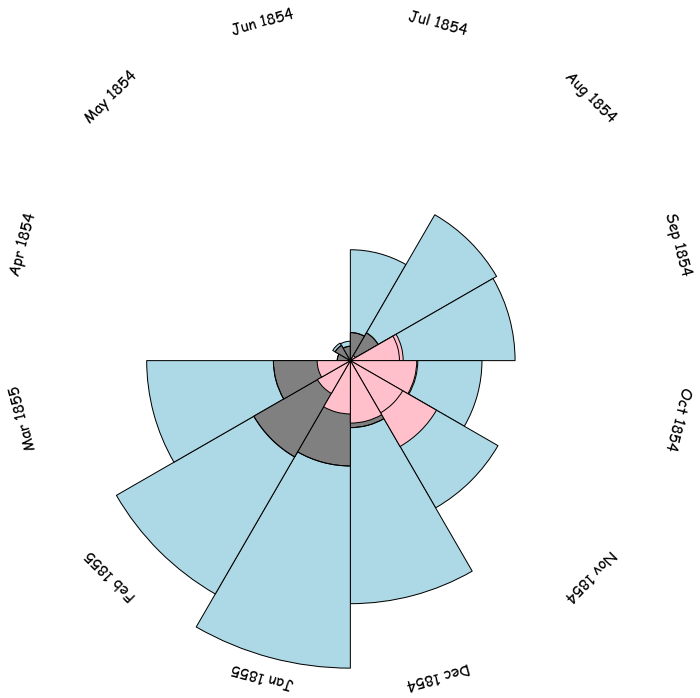

In [5]:
# Define a drawing board and some variables for drawing

fig, ax = plt.subplots()
fig.set_size_inches(10,10,True)

# 'P_*' means the patches for '*' color
P_Blue = []
P_Red = []
P_Black = []

# 'r' is used to define the distance between the labels and the chart centre
r = max(blue1)

# Append the lists for different colors and draw the arcs for black wedges

for i in range(len(m1)):
    w_blue = pch.Wedge((0,0), blue1[i], (180 - angle * (i+1)), (180 - angle * i))
    w_red = pch.Wedge((0,0), red1[i], (180 - angle * (i+1)), (180 - angle * i))
    w_black = pch.Wedge((0,0), black1[i], (180 - angle * (i+1)), (180 - angle * i))
    w_arc = pch.Arc((0,0), (2 * black1[i]), (2 * black1[i]), 0,  (180 - angle * (i+1)), (180 - angle * i), lw=1)
    
    P_Blue.append(w_blue)
    P_Red.append(w_red)
    P_Black.append(w_black)
    
    ax.add_patch(w_arc)

# Label each part

for i in range(len(m1)):
    x = (r + 10) * np.cos((180 - angle * (i+0.5)) * np.pi / 180)
    y = (r + 10) * np.sin((180 - angle * (i+0.5)) * np.pi / 180)
    plt.text(x, y, m1[i], ha='center', family='fantasy', rotation = (90 - angle * (i+0.5)), size=15)
    
# Collect the wedges and color them in different colors
        
C_Blue = PatchCollection(P_Blue, facecolor = 'lightblue', alpha=1, edgecolor = 'black')
C_Red = PatchCollection(P_Red, facecolor = 'pink', alpha=1, edgecolor = 'black')
C_Black = PatchCollection(P_Black, facecolor = 'gray', alpha=1, edgecolor = 'black')

# Draw the chart and save it as a PNG file

ax.add_collection(C_Blue)
ax.add_collection(C_Black)
ax.add_collection(C_Red)

plt.axis('equal')
plt.axis('off')
plt.tight_layout()
plt.savefig('RoseChart_v1.png')
plt.show()

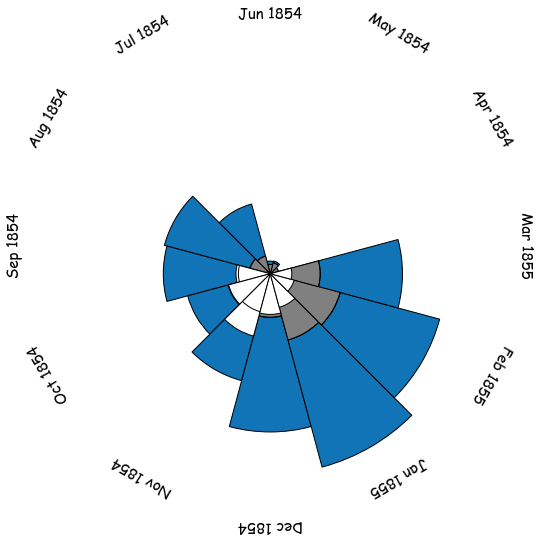

In [6]:
# Repeat the steps above but in different parameters

fig, ax = plt.subplots()
fig.set_size_inches(10,10,True)
P_Blue = []
P_Red = []
P_Black = []
r = max(blue1)

# Change the radiuses to make the chart be zoomed differently with the previous one
# Change the starting value and ending value for angles to make the chart be rotated differently with the previous one
# Change the order of  the angles to make the chart be repositioned with the previous one

for i in range(len(m1)):
    w_blue = pch.Wedge((0,0), 0.8 * blue1[i], (angle * i + 15), (angle * (i+1) + 15))
    w_red = pch.Wedge((0,0), 0.8 * red1[i], (angle * i + 15), (angle * (i+1) + 15))
    w_black = pch.Wedge((0,0), 0.8 * black1[i], (angle * i + 15), (angle * (i+1) + 15))
    w_arc = pch.Arc((0,0), (1.6 * black1[i]), (1.6 * black1[i]), 0, (angle * i + 15), (angle * (i+1) + 15), lw=1)
    
    P_Blue.append(w_blue)
    P_Red.append(w_red)
    P_Black.append(w_black)
    
    ax.add_patch(w_arc)

for i in range(len(m1)):
    x = (r + 2) * np.cos((angle * (i+0.5) + 15) * np.pi / 180)
    y = (r + 2) * np.sin((angle * (i+0.5)+15) * np.pi / 180)
    plt.text(x, y, m1[i], ha='center', family='fantasy', rotation = (angle * (i+0.5) - 90 +15), size=15)
    
# Change the color for each part

C_Blue = PatchCollection(P_Blue, facecolor = '#1074b7', alpha=1, edgecolor = 'black')
C_Red = PatchCollection(P_Red, facecolor = 'white', alpha=1, edgecolor = 'black')
C_Black = PatchCollection(P_Black, facecolor = '#808080', alpha=1, edgecolor = 'black')

ax.add_collection(C_Blue)
ax.add_collection(C_Black)
ax.add_collection(C_Red)

plt.axis('equal')
plt.axis('off')
plt.tight_layout()
plt.savefig('RoseChart_v2.png')
plt.show()

Here are shown two verions of Rose Chart.


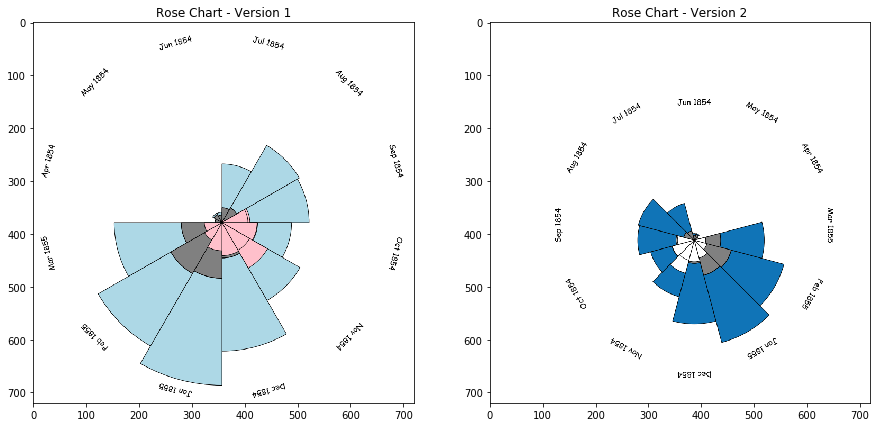

In [7]:
# Load the PNG files in order to show them together

chart1 = plt.imread('RoseChart_v1.png')
chart2 = plt.imread('RoseChart_v2.png')

fig = plt.figure(figsize = (15,15))

ax = fig.add_subplot(121, title='Rose Chart - Version 1')
plt.imshow(chart1)

ax = fig.add_subplot(122, title='Rose Chart - Version 2')
plt.imshow(chart2)

print('Here are shown two verions of Rose Chart.')

### It could be easily seen that these two rose charts are zoomed, repositioned and rotated differently.